<a href="https://colab.research.google.com/github/magedfawzy/TheCatalog/blob/main/MachineLearning_Comparitive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data Preprocessing Step by Step</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler  

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

In [5]:
df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv', sep=',')
credit = df.copy()
print(type(credit))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>


<h1> Data Exploration </h1>

In [6]:
credit.head(15)  

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [7]:
credit.shape

(899164, 27)

In [8]:
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [9]:
credit = credit.drop_duplicates(keep = 'first')

In [10]:
credit.isnull().sum()  

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [11]:
#removing rows with null values from all columns with null values except ChgOffDate column 
credit.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
credit.isnull().sum() 

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [12]:
del credit['ChgOffDate']

In [13]:
credit.shape

(886240, 26)

In [14]:
credit.isnull().sum() 

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [15]:
#MApping the industry to NAICS Value 
credit['nIndustry'] = credit['NAICS'].astype('str').apply(lambda x: x[:2])

In [16]:
credit.nIndustry.unique()

array(['45', '72', '62', '0', '33', '81', '23', '44', '42', '61', '53',
       '54', '31', '51', '71', '52', '21', '32', '56', '48', '11', '92',
       '22', '49', '55'], dtype=object)

In [17]:
credit['Industry'] = credit['NAICS'].astype('str').apply(lambda x: x[:2])

In [18]:
credit['Industry'] = credit['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})


In [19]:
# Remove records where Industry is NaN (NAICS code was a 0)
credit.dropna(subset=['Industry'], inplace=True)

In [20]:
credit.isnull().sum() 

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
nIndustry            0
Industry             0
dtype: int64

In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  int64  
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  float64
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

# Data Cleaning/Removing duplicates and inaccuracies in our dataset

In [22]:
#in the order of columns in the dataset
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  int64  
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  float64
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

In [23]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats

credit_copy = credit[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
del credit['DisbursementGross']
del credit['BalanceGross']
del credit['ChgOffPrinGr']
del credit['GrAppv']
del credit['SBA_Appv']

credit = pd.concat([credit, credit_copy],axis =1)
#credit.shape  

In [24]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
credit = credit.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Check to see dtypes so far
credit.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  object 
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  int64  
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

In [25]:
credit['BankState'].unique()

array(['OH', 'IN', 'DE', 'AL', 'FL', 'GA', 'OR', 'MN', 'NC', 'MS', 'SD',
       'SC', 'TX', 'LA', 'IA', 'CA', 'TN', 'VA', 'MA', 'RI', 'PA', 'MO',
       'WA', 'UT', 'IL', 'KS', 'WI', 'NJ', 'CT', 'MD', 'NY', 'NH', 'ND',
       'MT', 'MI', 'CO', 'WY', 'OK', 'KY', 'ME', 'NM', 'DC', 'NV', 'NE',
       'WV', 'AZ', 'ID', 'AR', 'VT', 'HI', 'AK', 'PR', 'GU', 'AN', 'VI'],
      dtype=object)

In [26]:
#Removing the nan value from bankstate

credit = credit[credit.BankState != 'nan']

In [27]:
credit['BankState'].unique()

array(['OH', 'IN', 'DE', 'AL', 'FL', 'GA', 'OR', 'MN', 'NC', 'MS', 'SD',
       'SC', 'TX', 'LA', 'IA', 'CA', 'TN', 'VA', 'MA', 'RI', 'PA', 'MO',
       'WA', 'UT', 'IL', 'KS', 'WI', 'NJ', 'CT', 'MD', 'NY', 'NH', 'ND',
       'MT', 'MI', 'CO', 'WY', 'OK', 'KY', 'ME', 'NM', 'DC', 'NV', 'NE',
       'WV', 'AZ', 'ID', 'AR', 'VT', 'HI', 'AK', 'PR', 'GU', 'AN', 'VI'],
      dtype=object)

In [28]:
credit['ApprovalFY'].unique()

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, '2004', '1994', '1995', '2005',
       '1996', 1996], dtype=object)

In [29]:

def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


credit['ApprovalFY'] = credit['ApprovalFY'].apply(clean_str).astype('int64')

In [30]:
credit['ApprovalFY'].unique() 

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, 1995, 1996])

In [31]:
credit['FranchiseCode'].unique() 

array([    1, 15100, 10656, ..., 16452, 35618, 18701])

In [32]:
credit['UrbanRural'].unique()  

array(['0', '1', '2'], dtype=object)

In [33]:
##some of the fields that are considered flags already but aren't necessarily in a useable format right now. 
#These include the NewExist, RevLineCr, LowDoc, and MIS_Status fields.  

In [34]:
credit['NewExist'].unique()  

array([2, 1, 0])

In [35]:
# Keep records where NewExist == 1 or 2
credit = credit[(credit['NewExist'] == 1) | (credit['NewExist'] == 2)]

In [36]:
# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
credit.loc[(credit['NewExist'] == 1), 'NewBusiness'] = 0
credit.loc[(credit['NewExist'] == 2), 'NewBusiness'] = 1

#see that a new column New Business is created
credit.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687246 entries, 0 to 899161
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687246 non-null  int64  
 1   Name               687246 non-null  object 
 2   City               687246 non-null  object 
 3   State              687246 non-null  object 
 4   Zip                687246 non-null  object 
 5   Bank               687246 non-null  object 
 6   BankState          687246 non-null  object 
 7   NAICS              687246 non-null  int64  
 8   ApprovalDate       687246 non-null  object 
 9   ApprovalFY         687246 non-null  int64  
 10  Term               687246 non-null  int64  
 11  NoEmp              687246 non-null  int64  
 12  NewExist           687246 non-null  int64  
 13  CreateJob          687246 non-null  int64  
 14  RetainedJob        687246 non-null  int64  
 15  FranchiseCode      687246 non-null  int64  
 16  Ur

In [37]:
credit['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [38]:

credit= credit[(credit.RevLineCr == 'Y') | (credit.RevLineCr =='N')]
cleanup_revline = {'RevLineCr':     {'Y': 1, 'N': 0}}
credit.replace(cleanup_revline, inplace=True)



In [39]:
credit['RevLineCr']

0         0
1         0
2         0
5         0
7         0
         ..
899145    1
899146    0
899157    0
899160    1
899161    0
Name: RevLineCr, Length: 458730, dtype: int64

In [40]:
credit['RevLineCr'].unique()

array([0, 1])

In [41]:
#lowdoc 
credit['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [42]:
credit= credit[(credit.LowDoc == 'Y') | (credit.LowDoc =='N')]

In [43]:
credit['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [44]:
cleanup_lowdoc = {'LowDoc': {'Y': 1, 'N': 0}}
credit.replace(cleanup_lowdoc, inplace=True)

In [45]:
credit['LowDoc'].unique()

array([1, 0])

In [46]:
#MIS Status 
credit['MIS_Status'].unique() 

array(['P I F', 'CHGOFF'], dtype=object)

In [47]:
cleanup_mis = {'MIS_Status':{'P I F': 1, 'CHGOFF': 0}}
credit.replace(cleanup_mis, inplace=True) 

In [48]:
credit['MIS_Status'].unique()  

array([1, 0])

In [49]:
credit['MIS_Status'].value_counts()

1    358558
0     98382
Name: MIS_Status, dtype: int64

In [50]:
credit.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      456940 non-null  int64  
 1   Name               456940 non-null  object 
 2   City               456940 non-null  object 
 3   State              456940 non-null  object 
 4   Zip                456940 non-null  object 
 5   Bank               456940 non-null  object 
 6   BankState          456940 non-null  object 
 7   NAICS              456940 non-null  int64  
 8   ApprovalDate       456940 non-null  object 
 9   ApprovalFY         456940 non-null  int64  
 10  Term               456940 non-null  int64  
 11  NoEmp              456940 non-null  int64  
 12  NewExist           456940 non-null  int64  
 13  CreateJob          456940 non-null  int64  
 14  RetainedJob        456940 non-null  int64  
 15  FranchiseCode      456940 non-null  int64  
 16  Ur

In [51]:
# Create flag column IsFranchise based on FranchiseCode column
credit.loc[(credit['FranchiseCode'] <= 1), 'IsFranchise'] = 0
credit.loc[(credit['FranchiseCode'] > 1), 'IsFranchise'] = 1 

In [52]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
credit['StateSame'] = np.where(credit['State'] == credit['BankState'], 1, 0)

In [53]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
credit['SBA_AppvPct'] = credit['SBA_Appv'] / credit['GrAppv']
credit = credit.astype({'SBA_AppvPct': 'int64'})

In [54]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
credit['AppvDisbursed'] = np.where(credit['DisbursementGross'] == credit['GrAppv'], 1, 0) 

In [55]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      456940 non-null  int64  
 1   Name               456940 non-null  object 
 2   City               456940 non-null  object 
 3   State              456940 non-null  object 
 4   Zip                456940 non-null  object 
 5   Bank               456940 non-null  object 
 6   BankState          456940 non-null  object 
 7   NAICS              456940 non-null  int64  
 8   ApprovalDate       456940 non-null  object 
 9   ApprovalFY         456940 non-null  int64  
 10  Term               456940 non-null  int64  
 11  NoEmp              456940 non-null  int64  
 12  NewExist           456940 non-null  int64  
 13  CreateJob          456940 non-null  int64  
 14  RetainedJob        456940 non-null  int64  
 15  FranchiseCode      456940 non-null  int64  
 16  Ur

In [56]:
credit.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,nIndustry,Industry,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,0,1,28-Feb-99,1,45,Retail_trade,60000.0,0.0,0.0,60000.0,48000.0,1.0,0.0,0,0,1
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,0,1,31-May-97,1,72,Accom/Food_serv,40000.0,0.0,0.0,40000.0,32000.0,1.0,0.0,1,0,1
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,0,0,31-Dec-97,1,62,Healthcare/Social_assist,287000.0,0.0,0.0,287000.0,215250.0,0.0,0.0,1,0,1
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1,0,0,1,0,0,0,30-Jun-97,1,33,Manufacturing,517000.0,0.0,0.0,517000.0,387750.0,0.0,0.0,0,0,1
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2,0,0,1,0,0,1,30-Jun-98,1,81,Other_no_pub,45000.0,0.0,0.0,45000.0,36000.0,1.0,0.0,0,0,1
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2,0,0,1,0,0,0,31-Jul-97,1,72,Accom/Food_serv,305000.0,0.0,0.0,305000.0,228750.0,1.0,0.0,1,0,1
10,1000134004,COMMERCIAL TRUCKING MAINTENANC,CHARLOTTE,NC,28256,SUNTRUST BANK,GA,811111,28-Feb-97,1997,84,1,2,0,0,1,0,0,1,23-Feb-98,1,81,Other_no_pub,70000.0,0.0,0.0,70000.0,56000.0,1.0,0.0,0,0,1
11,1000144007,PROFESSIONAL ELEVATOR SERVICES,CHICAGO,IL,60605,BANK OF AMERICA NATL ASSOC,OR,235950,28-Feb-97,1997,60,24,1,0,0,1,0,0,0,30-Nov-97,1,23,Construction,150000.0,0.0,0.0,300000.0,225000.0,0.0,0.0,0,0,0
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,7-Feb-06,2006,162,2,2,0,0,15100,1,0,0,31-Mar-06,1,44,Retail_trade,253400.0,0.0,0.0,253400.0,190050.0,1.0,1.0,0,0,1
15,1000244002,"ENVIRONMENTAL ROOFING SYSTEMS,",OKLAHOMA CITY,OK,73112,BANK OF AMERICA NATL ASSOC,NC,421330,28-Feb-97,1997,12,5,2,0,0,1,0,0,0,30-Sep-97,1,42,Wholesale_trade,350000.0,0.0,0.0,350000.0,262500.0,1.0,0.0,0,0,1


In [57]:
#Now that the flag fields have been addressed, let's check the date fields. 

In [58]:
credit.ApprovalDate.unique() 

array(['28-Feb-97', '7-Feb-06', '21-Jul-97', ..., '25-Feb-97',
       '26-Feb-97', '27-Feb-97'], dtype=object)

In [59]:
credit['ApprovalDate'] = pd.to_datetime(credit['ApprovalDate'])
credit['DisbursementDate'] = pd.to_datetime(credit['DisbursementDate'])  

In [60]:
credit['DisbursementDate'].head(10)

0    1999-02-28
1    1997-05-31
2    1997-12-31
5    1997-06-30
7    1998-06-30
8    1997-07-31
10   1998-02-23
11   1997-11-30
12   2006-03-31
15   1997-09-30
Name: DisbursementDate, dtype: datetime64[ns]

In [61]:
#creating days to disbursement column 

credit['DaysToDisbursement'] = credit['DisbursementDate'] - credit['ApprovalDate']
credit['DaysToDisbursement'] = credit['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')
credit['DisbursementFY'] = credit['DisbursementDate'].map(lambda x: x.year)


In [62]:
# Creating default column from MIS_Status 
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan

credit.loc[(credit['MIS_Status'] <= 0), 'Default'] = 1
credit.loc[(credit['MIS_Status'] >= 1), 'Default'] = 0 
credit['Default'].value_counts()

0.0    358558
1.0     98382
Name: Default, dtype: int64

In [63]:
credit['Default'].unique()

array([0., 1.])

In [64]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       456940 non-null  int64         
 1   Name                456940 non-null  object        
 2   City                456940 non-null  object        
 3   State               456940 non-null  object        
 4   Zip                 456940 non-null  object        
 5   Bank                456940 non-null  object        
 6   BankState           456940 non-null  object        
 7   NAICS               456940 non-null  int64         
 8   ApprovalDate        456940 non-null  datetime64[ns]
 9   ApprovalFY          456940 non-null  int64         
 10  Term                456940 non-null  int64         
 11  NoEmp               456940 non-null  int64         
 12  NewExist            456940 non-null  int64         
 13  CreateJob           456940 no

In [65]:
#Format dtypes where necessary after feature engineering
credit = credit.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
credit.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
DisbursementDate      datetime64[ns]
MIS_Status                     int64
nIndustry                     object
Industry                      object
DisbursementGross            float64
BalanceGross                 float64
ChgOffPrinGr                 float64
GrAppv                       float64
S

In [66]:
credit['RealEstate'] = np.where(credit['Term'] >= 240, 1, 0)

In [67]:
credit_2007_till_2009 = (credit['DisbursementFY']>=2007) & (credit['DisbursementFY']<=2009 )
credit['Recession']=np.where(credit_2007_till_2009, 1,0)

credit[credit['DisbursementFY'] ==2007][['DisbursementFY', 'Recession']]

,DisbursementFY,Recession
1135,2007,1
1751,2007,1
1908,2007,1
2052,2007,1
2061,2007,1
...,...,...
890546,2007,1
891595,2007,1
891761,2007,1
891921,2007,1


In [68]:
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,nIndustry,Industry,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed,DaysToDisbursement,DisbursementFY,Default,RealEstate,Recession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2,0,0,1,0,0,1,1999-02-28,1,45,Retail_trade,60000.0,0.0,0.0,60000.0,48000.0,1,0,0,0,1,730,1999,0.0,0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2,0,0,1,0,0,1,1997-05-31,1,72,Accom/Food_serv,40000.0,0.0,0.0,40000.0,32000.0,1,0,1,0,1,92,1997,0.0,0,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1,0,0,1,0,0,0,1997-12-31,1,62,Healthcare/Social_assist,287000.0,0.0,0.0,287000.0,215250.0,0,0,1,0,1,306,1997,0.0,0,0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,120,19,1,0,0,1,0,0,0,1997-06-30,1,33,Manufacturing,517000.0,0.0,0.0,517000.0,387750.0,0,0,0,0,1,122,1997,0.0,0,0
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,84,1,2,0,0,1,0,0,1,1998-06-30,1,81,Other_no_pub,45000.0,0.0,0.0,45000.0,36000.0,1,0,0,0,1,487,1998,0.0,0,0


# Visualizations  and Analysis

<h1> Total/Average disbursed loan amount by industry <h1>

<BarContainer object of 20 artists>

[Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Public_Admin')]

Text(0.5, 1.0, 'Gross SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Gross Loan Disbursement (Billions)')

<BarContainer object of 20 artists>

[Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Public_Admin')]

Text(0.5, 1.0, 'Average SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Average Loan Disbursement')

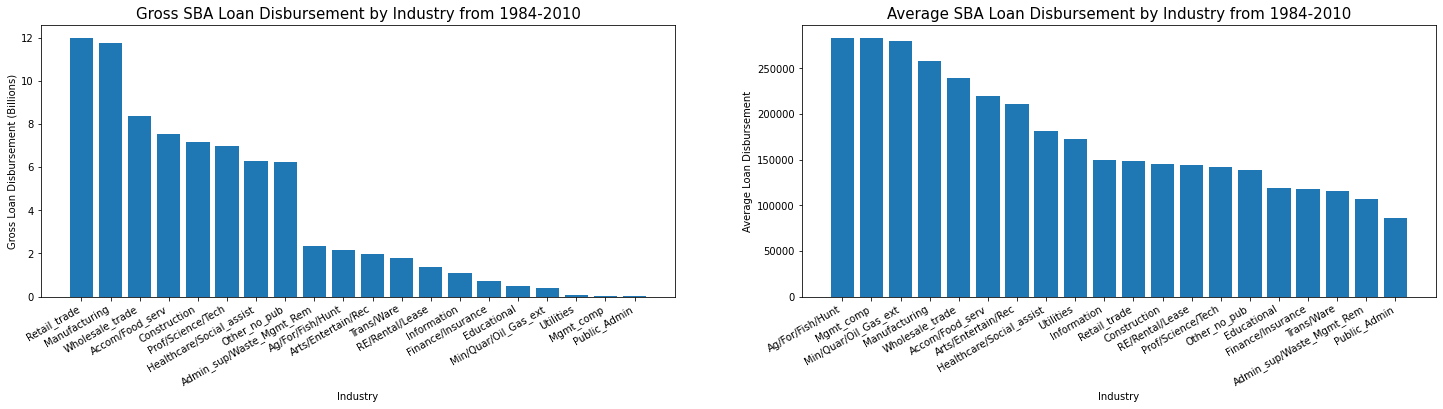

None


In [69]:

# Create a groupby object on Industry for use in visualization
industry_group = credit.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
credit_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
credit_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry 
ax1.bar(credit_industrySum.index, credit_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(credit_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(credit_industryAve.index, credit_industryAve['DisbursementGross'])
ax2.set_xticklabels(credit_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

print(plt.show())

<h1> Average days to disbursement by industry </h1>

<BarContainer object of 20 artists>

[Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Public_Admin'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Trans/Ware')]

Text(0.5, 1.0, 'Average Days to SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Average Days to Disbursement')

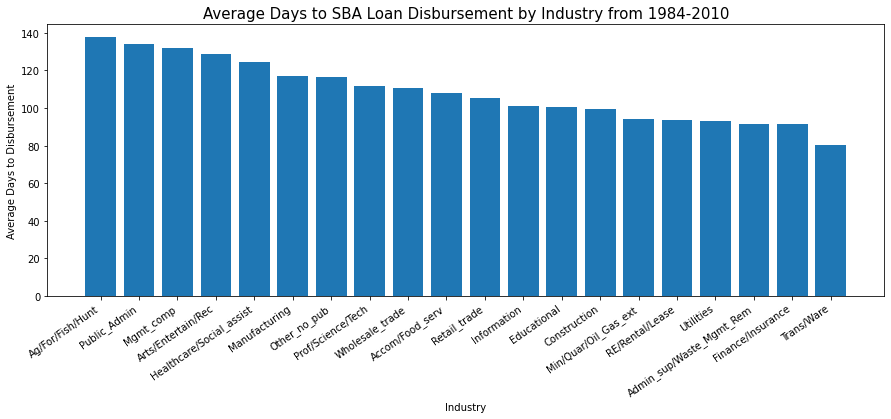

In [70]:
# Average days to disbursement by industry
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(credit_industryAve.index, credit_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(credit_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

<h1> Default Percentage by Industry </h1>

In [71]:
# Check Default percentage by Industry
def_ind = credit.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/ (def_ind[1] + def_ind[0])
print(def_ind)

Default                     0.0    1.0  Def_Percent
Industry                                           
Accom/Food_serv           25701   8565     0.249956
Admin_sup/Waste_Mgmt_Rem  16537   5475     0.248728
Ag/For/Fish/Hunt           6960    669     0.087692
Arts/Entertain/Rec         7311   1953     0.210816
Construction              37053  12185     0.247471
Educational                2918   1087     0.271411
Finance/Insurance          4232   2104     0.332071
Healthcare/Social_assist  30878   3627     0.105115
Information                5509   1843     0.250680
Manufacturing             38187   7343     0.161278
Mgmt_comp                    97     23     0.191667
Min/Quar/Oil_Gas_ext       1234    119     0.087953
Other_no_pub              35360   9439     0.210697
Prof/Science/Tech         39290   9911     0.201439
Public_Admin                153     30     0.163934
RE/Rental/Lease            6441   3112     0.325762
Retail_trade              61706  19246     0.237746
Trans/Ware  

<h1> Default Percentage by State </h1>

In [72]:
# Check Default percentage by State
def_state = credit.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default,0.0,1.0,Def_Percent
State,,,
AK,1006,97,0.087942
AL,3299,816,0.198299
AR,2519,534,0.174910
AZ,5440,2504,0.315206
CA,45091,16296,0.265463
CO,7866,2381,0.232361
CT,5503,1074,0.163296
DC,592,158,0.210667
DE,873,249,0.221925


<h1>Paid in Full and Defaulted Loans</h1>

[Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Public_Admin'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Wholesale_trade')]

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by State from 1984-2010')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

None


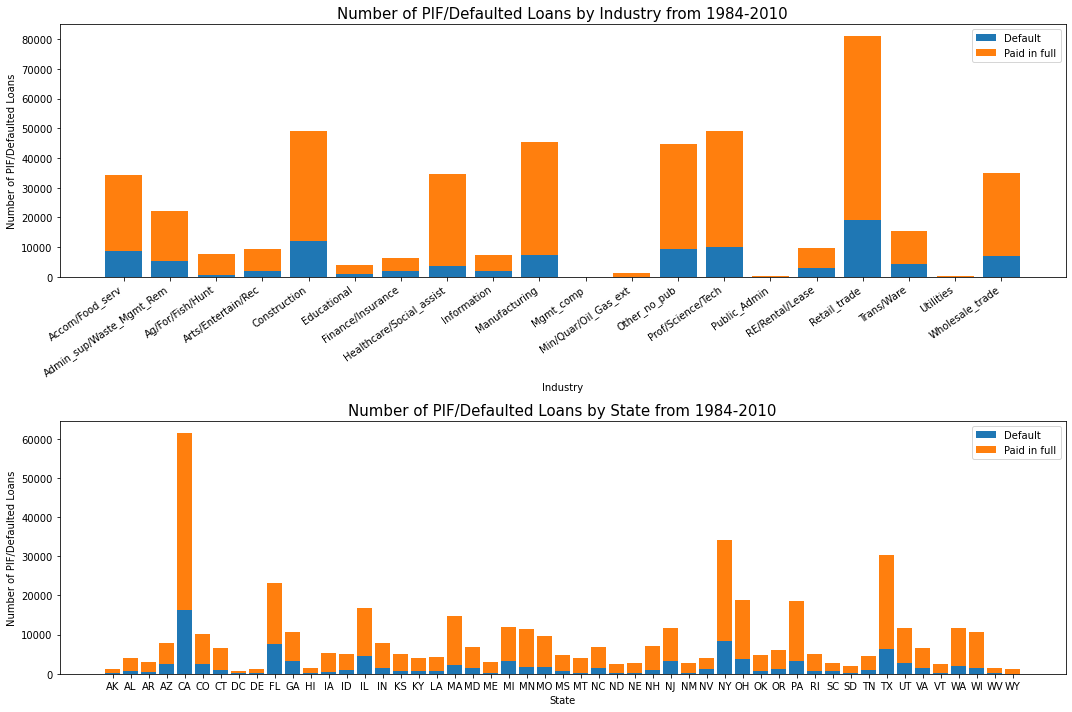

None


In [73]:
# Paid in full and defaulted loans
fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=credit, col='Industry', axes=ax1a)
ax1a.set_xticklabels(credit.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=credit, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

print(plt.tight_layout())
print(plt.show())

<h1> Paid in Full and Defaulted Loans by DisbursementFY </h1>

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by State from 1984-2010')

Text(0.5, 0, 'Disbursement Year')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

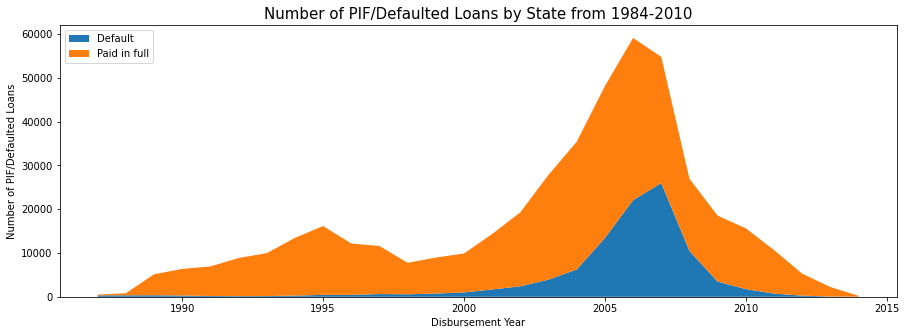

In [74]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = credit.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index 
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

<h1> Defaulted Loans Backed by Real Estate Percentage vs. Defaulted Loans Active During Recession

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010')

Text(0.5, 0, 'Loan Backed by Real Estate')

Text(0, 0.5, 'Number of Loans')

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010')

Text(0.5, 0, 'Loan Active during Great Recession')

Text(0, 0.5, 'Number of Loans')

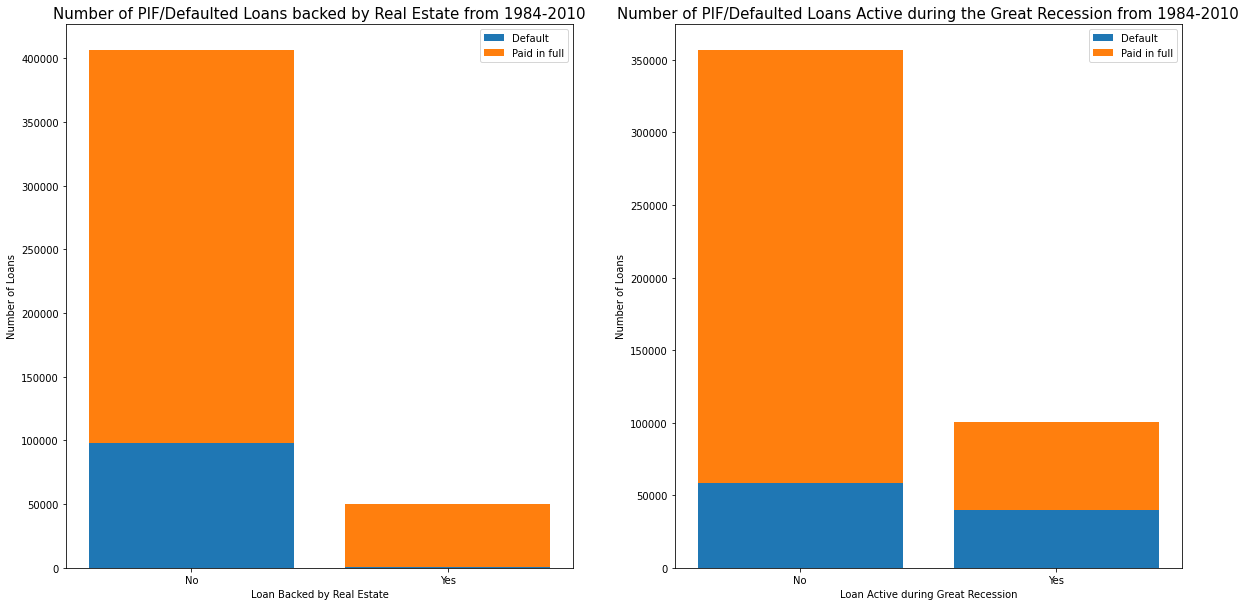

In [75]:
fig5 = plt.figure(figsize=(20, 10))

ax1b = fig5.add_subplot(1, 2, 1)
ax2b = fig5.add_subplot(1, 2, 2)

stacked_setup(df=credit, col='RealEstate', axes=ax1b)
ax1b.set_xticks(credit.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()

# Paid in full and defaulted loans active during the Great Recession
stacked_setup(df=credit, col='Recession', axes=ax2b)
ax2b.set_xticks(credit.groupby(['Recession', 'Default'])['Recession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

<h1>Heatmap</h1>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 <a list of 27 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 <a list of 27 Text major ticklabel objects>)

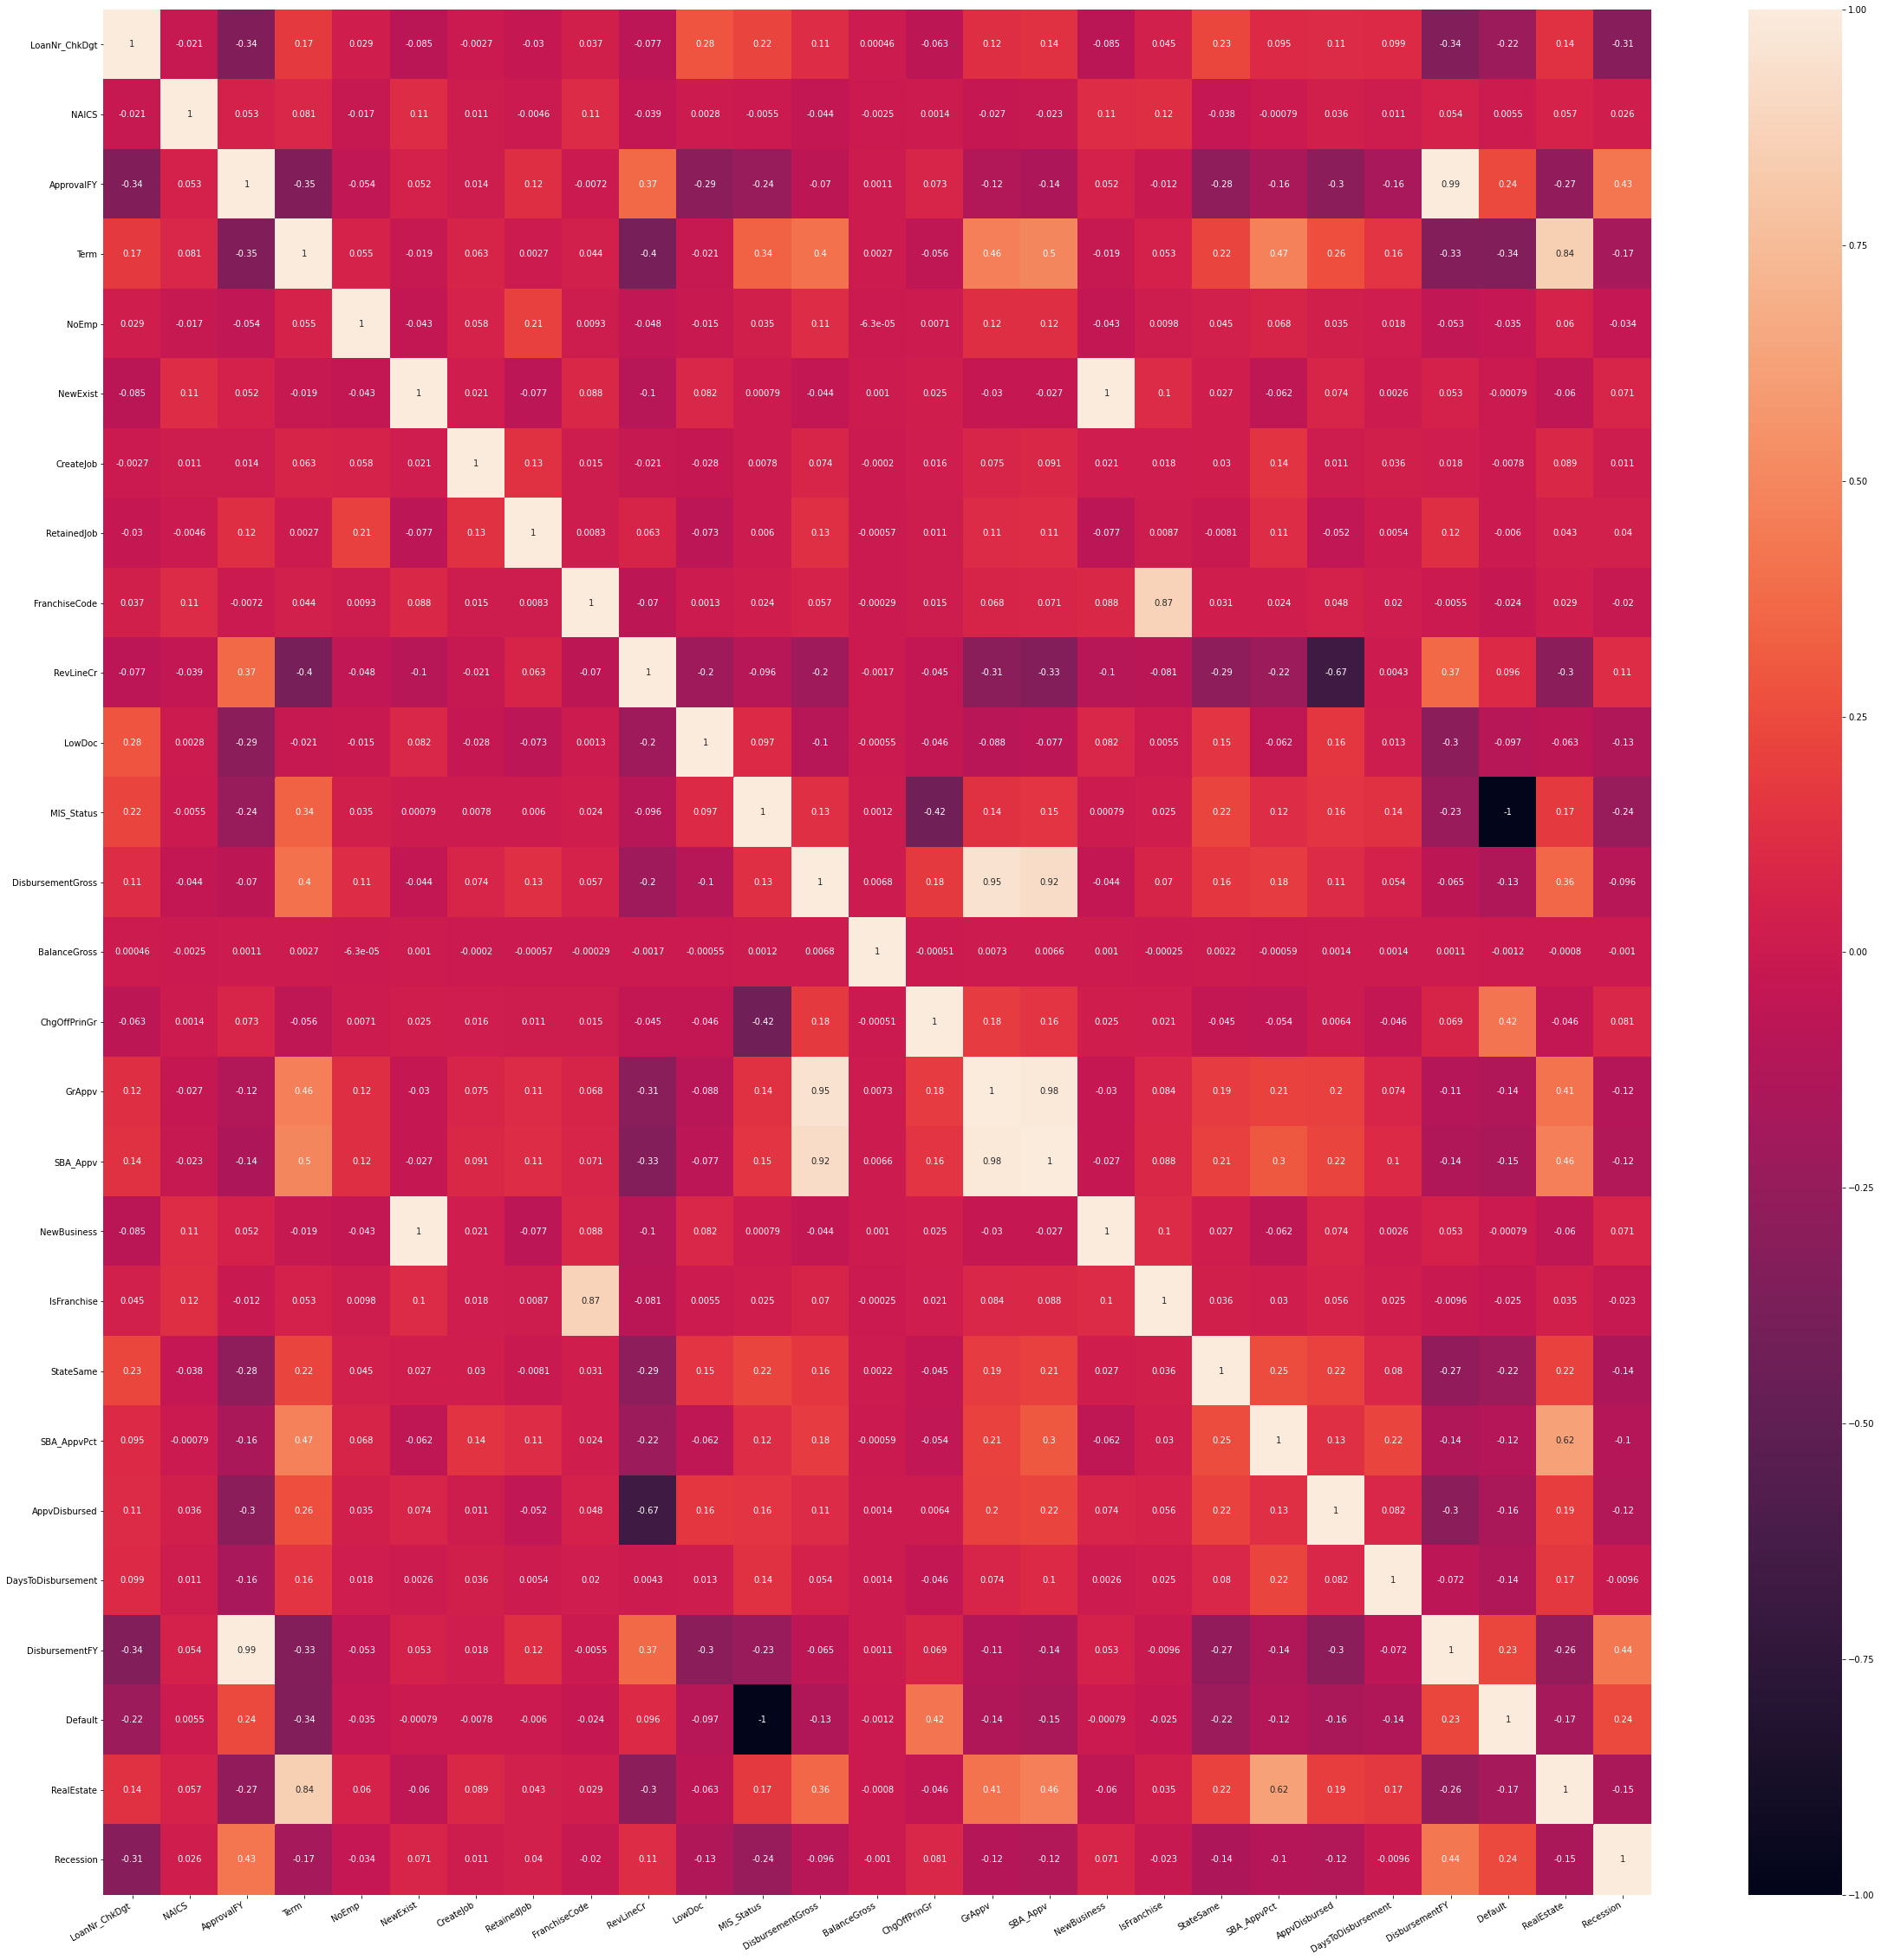

In [76]:
cor_fig, cor_ax = plt.subplots(figsize=(40, 40))
corr_matrix = credit.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
#plt.axes(autoscaley_on = True, clip_on = False)
plt.show()

In [77]:
corr = credit.corr()
corr.style.background_gradient(cmap='coolwarm')

,LoanNr_ChkDgt,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,MIS_Status,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed,DaysToDisbursement,DisbursementFY,Default,RealEstate,Recession
LoanNr_ChkDgt,1.000000,-0.021197,-0.343801,0.172931,0.028611,-0.085001,-0.002702,-0.030171,0.037114,-0.076553,0.284122,0.223978,0.111391,0.000458,-0.063241,0.124692,0.135678,-0.085001,0.045040,0.233443,0.095385,0.109246,0.098913,-0.337849,-0.223978,0.136882,-0.314548
NAICS,-0.021197,1.000000,0.052858,0.080894,-0.017009,0.112673,0.010847,-0.004636,0.109083,-0.039073,0.002824,-0.005495,-0.044031,-0.002518,0.001421,-0.026692,-0.022778,0.112673,0.122197,-0.037842,-0.000787,0.035516,0.011006,0.053972,0.005495,0.057386,0.026432
ApprovalFY,-0.343801,0.052858,1.000000,-0.345125,-0.054345,0.052378,0.014383,0.120987,-0.007210,0.367651,-0.293311,-0.240330,-0.070047,0.001138,0.072612,-0.117238,-0.144397,0.052378,-0.011682,-0.277167,-0.158414,-0.303116,-0.164709,0.993571,0.240330,-0.268804,0.428218
Term,0.172931,0.080894,-0.345125,1.000000,0.055173,-0.018533,0.063198,0.002654,0.044291,-0.396169,-0.021281,0.339963,0.399191,0.002734,-0.055869,0.461146,0.496434,-0.018533,0.053416,0.221469,0.474247,0.264149,0.155944,-0.333389,-0.339963,0.844459,-0.173113
NoEmp,0.028611,-0.017009,-0.054345,0.055173,1.000000,-0.042799,0.058441,0.206373,0.009291,-0.048011,-0.014797,0.034721,0.113772,-0.000063,0.007092,0.117544,0.118380,-0.042799,0.009816,0.044972,0.067728,0.035369,0.018282,-0.053281,-0.034721,0.059757,-0.034133
NewExist,-0.085001,0.112673,0.052378,-0.018533,-0.042799,1.000000,0.021466,-0.076591,0.087741,-0.101551,0.082086,0.000787,-0.043567,0.001044,0.025208,-0.029503,-0.027367,1.000000,0.102490,0.026617,-0.062151,0.073701,0.002559,0.052710,-0.000787,-0.059532,0.071363
CreateJob,-0.002702,0.010847,0.014383,0.063198,0.058441,0.021466,1.000000,0.133481,0.015073,-0.020555,-0.028090,0.007761,0.074337,-0.000202,0.015981,0.075342,0.090917,0.021466,0.018141,0.029815,0.142746,0.011479,0.036030,0.018398,-0.007761,0.088806,0.011374
RetainedJob,-0.030171,-0.004636,0.120987,0.002654,0.206373,-0.076591,0.133481,1.000000,0.008315,0.062803,-0.073452,0.006026,0.125973,-0.000570,0.011163,0.106336,0.110257,-0.076591,0.008682,-0.008054,0.112865,-0.052265,0.005429,0.123098,-0.006026,0.043102,0.039793
FranchiseCode,0.037114,0.109083,-0.007210,0.044291,0.009291,0.087741,0.015073,0.008315,1.000000,-0.070268,0.001336,0.023540,0.056736,-0.000291,0.015477,0.068333,0.071366,0.087741,0.872769,0.030835,0.024413,0.048264,0.020356,-0.005506,-0.023540,0.028943,-0.019600
RevLineCr,-0.076553,-0.039073,0.367651,-0.396169,-0.048011,-0.101551,-0.020555,0.062803,-0.070268,1.000000,-0.204278,-0.095505,-0.204549,-0.001710,-0.045338,-0.306484,-0.331637,-0.101551,-0.081165,-0.285954,-0.219652,-0.670021,0.004331,0.371049,0.095505,-0.299345,0.114114


<h1>PairPlot</h1>

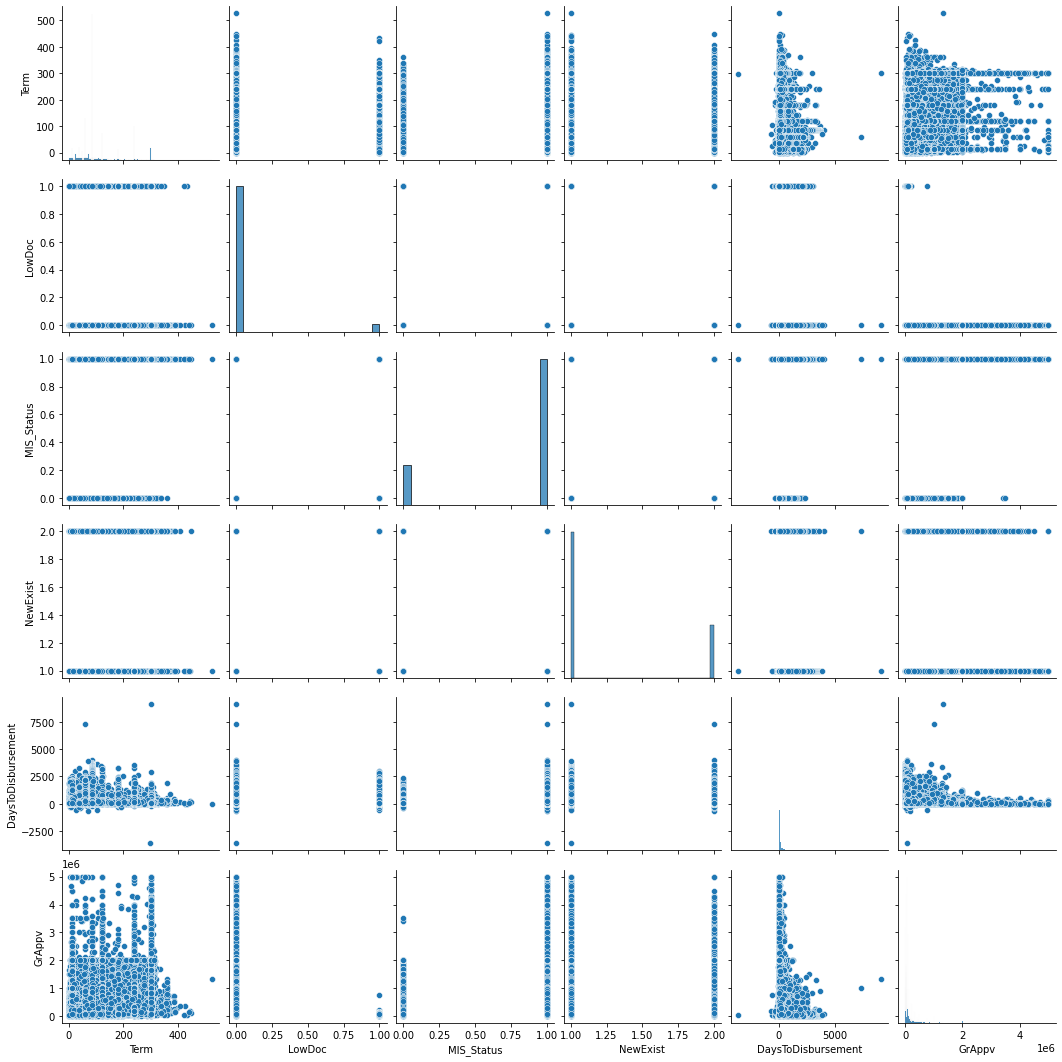

In [78]:
# Create a PairPlot

credit_subset = credit[['Term','LowDoc','MIS_Status','NewExist',\
                        'DaysToDisbursement','GrAppv']]
credit_pairplot = sns.pairplot(credit_subset)
credit_pairplot

# Modeling

In [79]:
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,nIndustry,Industry,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed,DaysToDisbursement,DisbursementFY,Default,RealEstate,Recession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2,0,0,1,0,0,1,1999-02-28,1,45,Retail_trade,60000.0,0.0,0.0,60000.0,48000.0,1,0,0,0,1,730,1999,0.0,0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2,0,0,1,0,0,1,1997-05-31,1,72,Accom/Food_serv,40000.0,0.0,0.0,40000.0,32000.0,1,0,1,0,1,92,1997,0.0,0,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1,0,0,1,0,0,0,1997-12-31,1,62,Healthcare/Social_assist,287000.0,0.0,0.0,287000.0,215250.0,0,0,1,0,1,306,1997,0.0,0,0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,120,19,1,0,0,1,0,0,0,1997-06-30,1,33,Manufacturing,517000.0,0.0,0.0,517000.0,387750.0,0,0,0,0,1,122,1997,0.0,0,0
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,84,1,2,0,0,1,0,0,1,1998-06-30,1,81,Other_no_pub,45000.0,0.0,0.0,45000.0,36000.0,1,0,0,0,1,487,1998,0.0,0,0


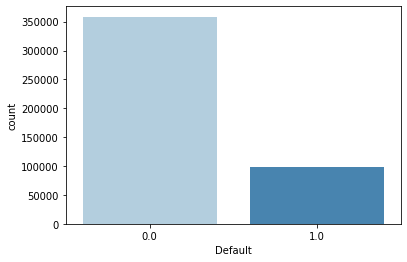

In [80]:
# Class Distribuition
sns.countplot(x="Default", data=credit, palette="Blues")

In [81]:
credit.shape

(456940, 38)

In [82]:
#input data for modeling
#cols=['Term','NoEmp', 'UrbanRural', 'RevLineCr','nIndustry','StateSame','State','SBA_AppvPct',
#'DaysToDisbursement', 'Recession','RealEstate'] 
cols1=['Term','NoEmp','RevLineCr', 'StateSame', 'SBA_AppvPct', 'DaysToDisbursement', 'Recession', 'RealEstate' ] 
cols2=['UrbanRural' , 'nIndustry', 'State']

a=credit[cols1]
b=credit[cols2]
y=credit['Default']   


In [83]:
a.skew() 

Term                   1.508794
NoEmp                 90.685105
RevLineCr              0.323957
StateSame              0.173159
SBA_AppvPct            3.616475
DaysToDisbursement     6.061549
Recession              1.355985
RealEstate             2.487565
dtype: float64

In [84]:
#!pip install pydrive                             # Package to use Google Drive API - not installed in Colab VM by default
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth                    # Other necessary packages
from oauth2client.client import GoogleCredentials
auth.authenticate_user()                         # Follow prompt in the authorization process
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({"id": "1HIU_P3ziZ5KHN7K8TgqzawdiZD5fs6CW"})   # "" is the part after "id=" in the shareable link
your_module.GetContentFile("skew_autotransform.py")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Term' had 'positive' skewness of 1.51

 Transformation yielded skewness of -2.14


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


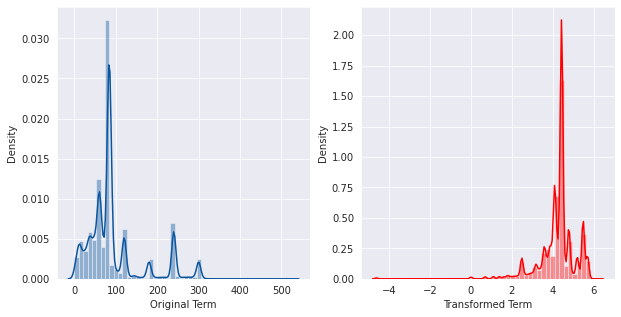

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'NoEmp' had 'positive' skewness of 90.69

 Transformation yielded skewness of -0.75


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


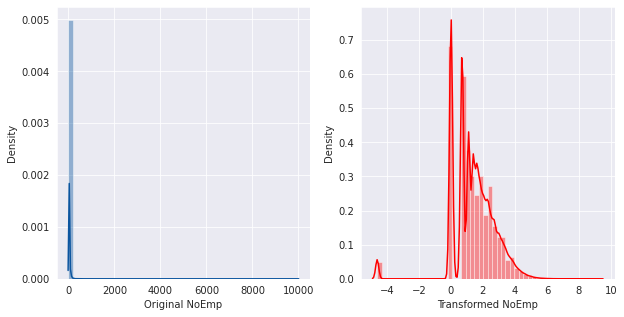

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'RevLineCr' . Skewness = 0.32


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


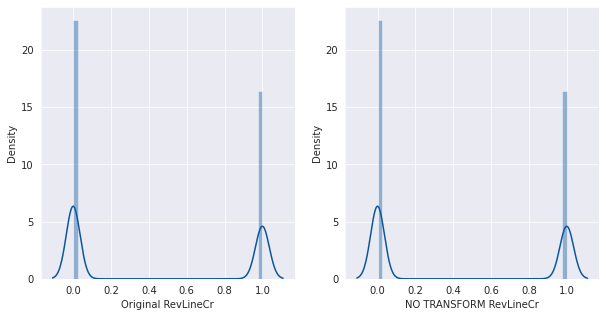

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'StateSame' . Skewness = 0.17


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


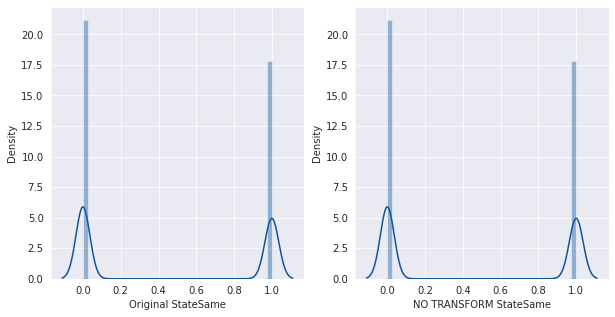

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'SBA_AppvPct' had 'positive' skewness of 3.62

 Transformation yielded skewness of 3.62


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


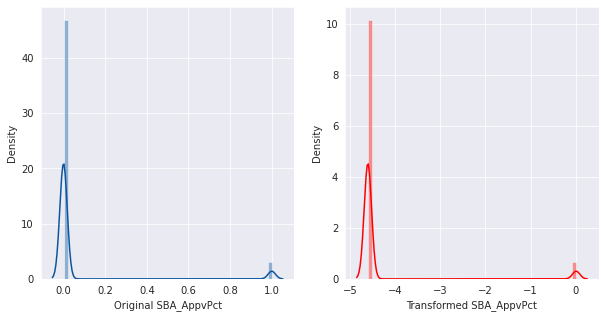

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'DaysToDisbursement' had 'positive' skewness of 6.06

 Transformation yielded skewness of -34.87


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


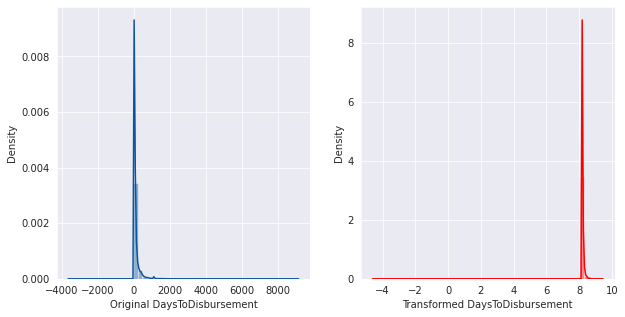

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Recession' had 'positive' skewness of 1.36

 Transformation yielded skewness of 1.36


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


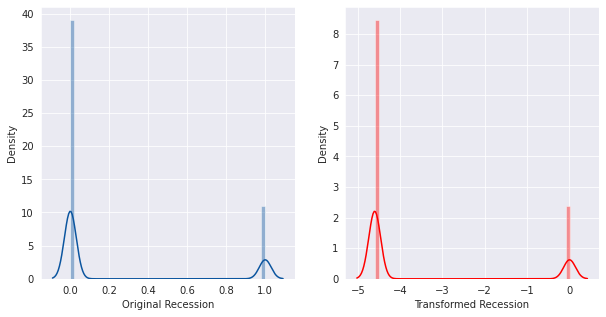

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'RealEstate' had 'positive' skewness of 2.49

 Transformation yielded skewness of 2.49


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


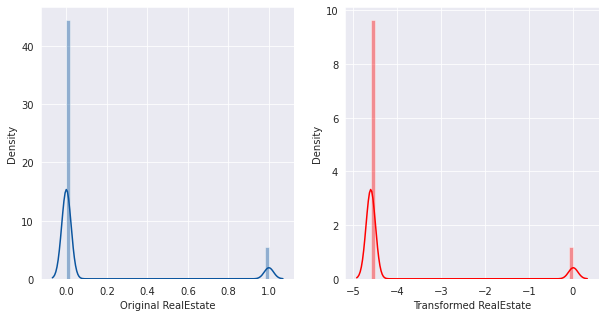

Original average skewness value was 13.28
Average skewness after transformation is 5.71


In [85]:
from skew_autotransform import skew_autotransform

skewed_cols = pd.DataFrame(a, columns = cols1)

transformedDF = skew_autotransform(skewed_cols.copy(deep=True), plot = True, exp = True, threshold = 1.0)

print('Original average skewness value was %2.2f' %(np.mean(abs(skewed_cols.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(transformedDF.skew()))))

In [86]:
X= pd.concat([transformedDF, b], axis=1)

In [87]:
X = pd.get_dummies(X)

In [88]:
X

,Term,NoEmp,RevLineCr,StateSame,SBA_AppvPct,DaysToDisbursement,Recession,RealEstate,UrbanRural_0,UrbanRural_1,UrbanRural_2,nIndustry_11,nIndustry_21,nIndustry_22,nIndustry_23,nIndustry_31,nIndustry_32,nIndustry_33,nIndustry_42,nIndustry_44,nIndustry_45,nIndustry_48,nIndustry_49,nIndustry_51,nIndustry_52,nIndustry_53,nIndustry_54,nIndustry_55,nIndustry_56,nIndustry_61,nIndustry_62,nIndustry_71,nIndustry_72,nIndustry_81,nIndustry_92,State_AK,State_AL,State_AR,State_AZ,State_CA,...,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,4.430936,1.388791,0,0,-4.60517,8.376553,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.094511,0.698135,0,1,-4.60517,8.217711,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.193012,1.947338,0,1,-4.60517,8.273849,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4.787575,2.944965,0,0,-4.60517,8.225773,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.430936,0.009950,0,0,-4.60517,8.318989,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,4.094511,1.611436,1,0,-4.60517,8.201389,-4.60517,-4.60517,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899146,5.480681,2.080691,0,1,0.00995,8.237746,-4.60517,0.00995,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899157,3.583797,3.689129,0,1,-4.60517,8.201389,-4.60517,-4.60517,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899160,4.094511,1.793425,1,0,-4.60517,8.258425,-4.60517,-4.60517,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1> Scaling </h1>

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

<h1> Splitting the dataset into the Training set and Test set </h1>

In [90]:
import sklearn
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

<h1> Logistic Regression </h1>

In [92]:
#running logistics regression 
from sklearn.linear_model import LogisticRegression

In [93]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
logreg = classifier_log.fit(X_train, y_train) 

In [94]:
y_pred_log = classifier_log.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
accuracy_score(y_test, y_pred_log)  

[[68229  3513]
 [10648  8998]]


0.8450453013524751

In [96]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred_log)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred_log)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred_log)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred_log))) 

Precision score: 0.7192
Recall score: 0.4580
Accuracy score: 0.8450
F1 score: 0.5596


In [97]:
print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_) 
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))  

lr.coef_: [[-1.38488261e+00 -1.17258023e-01 -3.40680534e-01 -5.19646489e-01
  -3.60668513e-02 -4.59544767e-01  3.84101402e-01 -1.94042961e-02
  -4.02309015e-01  2.50833363e-01  1.44173444e-01 -7.24650945e-02
  -4.39128004e-02 -2.61769010e-03  1.67944373e-02  1.10138143e-02
  -5.00433943e-03 -1.03258019e-01 -4.90506852e-02  1.00195657e-01
   6.32353806e-02 -9.20400681e-03  7.33136643e-03  1.79104659e-03
   3.74028605e-02  6.53495774e-02 -5.72254568e-02  2.12288549e-03
  -9.46927007e-03  6.54812978e-03 -1.60085906e-01  4.18391101e-02
   9.27226333e-02  4.70809916e-02 -1.62823860e-03 -3.60839607e-02
   4.45888208e-02  3.62540621e-02  4.97547901e-02  2.04704245e-01
   1.27626339e-02 -5.85171704e-02 -1.30907754e-02 -2.02145231e-04
   1.23369612e-01  9.03661289e-02 -2.61767476e-02 -4.34205373e-02
  -2.74231687e-02  1.00079771e-01 -4.60281066e-02 -3.97998303e-02
  -1.76788053e-02  3.93551898e-04 -1.09715512e-01 -3.13420778e-02
  -9.53452092e-02  4.69196163e-03 -6.89789842e-02 -1.86789624e-02


In [98]:
print( sklearn.metrics.classification_report(y_test,y_pred_log) )

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     71742
         1.0       0.72      0.46      0.56     19646

    accuracy                           0.85     91388
   macro avg       0.79      0.70      0.73     91388
weighted avg       0.83      0.85      0.83     91388



**GridSearch Using Logistic Regression**

In [99]:
# Running with tuning both C and gamma
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 0.2, 0.25, 0.5, 1]}]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.25, 0.5, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best Accuracy: 84.51 %
Best Parameters: {'C': 0.5}


In [100]:
print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_) 
print("Training set score: {:.3f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))  

lr.coef_: [[-1.38488261e+00 -1.17258023e-01 -3.40680534e-01 -5.19646489e-01
  -3.60668513e-02 -4.59544767e-01  3.84101402e-01 -1.94042961e-02
  -4.02309015e-01  2.50833363e-01  1.44173444e-01 -7.24650945e-02
  -4.39128004e-02 -2.61769010e-03  1.67944373e-02  1.10138143e-02
  -5.00433943e-03 -1.03258019e-01 -4.90506852e-02  1.00195657e-01
   6.32353806e-02 -9.20400681e-03  7.33136643e-03  1.79104659e-03
   3.74028605e-02  6.53495774e-02 -5.72254568e-02  2.12288549e-03
  -9.46927007e-03  6.54812978e-03 -1.60085906e-01  4.18391101e-02
   9.27226333e-02  4.70809916e-02 -1.62823860e-03 -3.60839607e-02
   4.45888208e-02  3.62540621e-02  4.97547901e-02  2.04704245e-01
   1.27626339e-02 -5.85171704e-02 -1.30907754e-02 -2.02145231e-04
   1.23369612e-01  9.03661289e-02 -2.61767476e-02 -4.34205373e-02
  -2.74231687e-02  1.00079771e-01 -4.60281066e-02 -3.97998303e-02
  -1.76788053e-02  3.93551898e-04 -1.09715512e-01 -3.13420778e-02
  -9.53452092e-02  4.69196163e-03 -6.89789842e-02 -1.86789624e-02


In [101]:
y_pred_log = logreg.predict(X_test)

In [102]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred_log)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred_log)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred_log)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred_log))) 

Precision score: 0.7192
Recall score: 0.4580
Accuracy score: 0.8450
F1 score: 0.5596


# Decision Tree


In [103]:
# running without tuning
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.919


In [104]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9191907033746225


In [105]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred)))

Precision score: 0.8145
Recall score: 0.8082
Accuracy score: 0.9192
F1 score: 0.8113


In [106]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[6.06542977e-01 4.12748321e-02 1.60396039e-02 5.11417041e-02
 5.27479079e-03 7.74162350e-02 2.41440877e-02 0.00000000e+00
 2.98282867e-02 3.88200664e-03 3.32447460e-03 1.66351278e-03
 3.31635154e-04 9.55140923e-05 4.86545464e-03 1.38627316e-03
 1.89080438e-03 3.10309267e-03 3.81600181e-03 5.34643574e-03
 3.84538646e-03 2.27782477e-03 3.12734688e-04 1.27597619e-03
 1.06748474e-03 1.78739949e-03 4.48237275e-03 3.39817683e-05
 2.95149324e-03 9.07762039e-04 3.90255961e-03 1.58148364e-03
 4.87317714e-03 4.57428711e-03 4.88788363e-05 1.91311703e-04
 9.43114445e-04 9.39105302e-04 1.39013515e-03 8.68137444e-03
 1.62687102e-03 1.33371261e-03 2.39204244e-04 3.85334932e-04
 3.48565203e-03 1.97781947e-03 2.71399545e-04 1.28920923e-03
 9.70089931e-04 3.42181849e-03 1.57000263e-03 1.23639267e-03
 1.49114279e-03 9.67995849e-04 2.34093624e-03 1.45518106e-03
 7.76997740e-04 2.38629411e-03 2.44814516e-03 1.85223024e-03
 1.07195579e-03 1.21967807e-03 1.34332175e-03 7.64625419e-04
 6.

In [107]:
# running with grid search
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,5),
           "min_samples_split": range(2,5,1),
           "max_leaf_nodes": range(2,10)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=2, n_jobs=-1)
grid_tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))

print(grid_tree.best_params_)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_leaf_nodes': range(2, 10),
                     

Accuracy on training set: 0.885
Accuracy on test set: 0.882
{'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}


In [108]:
y_pred = grid_tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8824791001006697


In [109]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred))) 

Precision score: 0.7197
Recall score: 0.7426
Accuracy score: 0.8825
F1 score: 0.7309


# Random Forest Classifier

In [110]:
# running random forest without tuning
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=800, n_jobs=-1, random_state=0, verbose=1)
rnd_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rnd_clf.score(X_test, y_test)))



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=800, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


Accuracy on training set: 0.916
Accuracy on test set: 0.913


In [111]:
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


0.9129426182868648


In [112]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred))) 

Precision score: 0.8443
Recall score: 0.7296
Accuracy score: 0.9129
F1 score: 0.7828


<h1> Support Vector Machine </h1>

In [113]:
svc_X_train, svc_X_test, svc_y_train, svc_y_test = train_test_split(X, y, train_size=10000, test_size = 2000, random_state = 0) 

In [114]:
from sklearn.svm import SVC 
classifier_svm = SVC(kernel = 'rbf', random_state = 0, verbose=1) 
classifier_svm.fit(svc_X_train, svc_y_train)   

print("Training set score: {:.3f}".format(classifier_svm.score(svc_X_train, svc_y_train)))
print("Test set score: {:.3f}".format(classifier_svm.score(svc_X_test, svc_y_test))) 

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=1)

Training set score: 0.867
Test set score: 0.844


In [115]:
y_pred_svm = classifier_svm.predict(svc_X_test)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(svc_y_test, y_pred_svm)
print(cm_svm)
accuracy_score(svc_y_test, y_pred_svm)  

[[1499   62]
 [ 251  188]]


0.8435

In [117]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(svc_y_test,y_pred_svm)))
print('Recall score: {:.4f}'.format(recall_score(svc_y_test,y_pred_svm)))
print('Accuracy score: {:.4f}'.format(accuracy_score(svc_y_test,y_pred_svm)))
print('F1 score: {:.4f}'.format(f1_score(svc_y_test,y_pred_svm))) 

Precision score: 0.7520
Recall score: 0.4282
Accuracy score: 0.8435
F1 score: 0.5457


**GridSearch Using SVM**

In [118]:
#Grid Search for SVM model and tuning both C and gamma
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1, 10,100], 'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.1, 1, 10]}]
grid_search = GridSearchCV(estimator = classifier_svm,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(svc_X_train, svc_y_train)

print("Training set score: {:.3f}".format(grid_search.score(svc_X_train, svc_y_train)))
print("Test set score: {:.3f}".format(grid_search.score(svc_X_test, svc_y_test))) 

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1, 10, 100],
                          'gamma': [0.0001, 0.001, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Training set score: 0.886
Test set score: 0.868
Best Accuracy: 86.78 %
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [119]:
y_pred_svm = classifier_svm.predict(svc_X_test)

In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(svc_y_test,y_pred_svm)))
print('Recall score: {:.4f}'.format(recall_score(svc_y_test,y_pred_svm)))
print('Accuracy score: {:.4f}'.format(accuracy_score(svc_y_test,y_pred_svm)))
print('F1 score: {:.4f}'.format(f1_score(svc_y_test,y_pred_svm))) 

Precision score: 0.7520
Recall score: 0.4282
Accuracy score: 0.8435
F1 score: 0.5457


<h1> XGBoost </h1>

In [121]:
pip install xgboost

In [122]:
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train) 

print("Training set score: {:.3f}".format(classifier_XGB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(classifier_XGB.score(X_test, y_test))) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training set score: 0.927
Test set score: 0.926


In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_XGB = classifier_XGB.predict(X_test)
accuracy_score(y_test, y_pred_XGB)


0.9263141769160065

In [124]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred_XGB)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred_XGB)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred_XGB)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred_XGB))) 

Precision score: 0.8502
Recall score: 0.7978
Accuracy score: 0.9263
F1 score: 0.8232


In [125]:
print("Feature importances:")
print(classifier_XGB.feature_importances_)

Feature importances:
[0.15400925 0.02135531 0.01650722 0.19835272 0.01881175 0.04270682
 0.10659211 0.         0.13333035 0.08242569 0.         0.00257292
 0.         0.         0.         0.         0.         0.
 0.00211162 0.00612809 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02188771 0.         0.01438068 0.00022867 0.         0.
 0.         0.00176415 0.         0.03596305 0.         0.
 0.         0.         0.02795883 0.01565581 0.         0.
 0.         0.01842018 0.         0.         0.         0.
 0.01620878 0.         0.00364813 0.         0.         0.
 0.         0.01045088 0.         0.         0.         0.
 0.01394568 0.         0.         0.         0.         0.
 0.         0.01994346 0.         0.         0.         0.
 0.         0.01464005 0.         0.         0.         0.
 0.         0.        ]


#### Applying K fold Cross Validation to XGBoost model

In [126]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_XGB, X = X_train, y = y_train, cv = 3 )
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 

Accuracy: 92.80 %
Standard Deviation: 0.12 %


In [127]:
credit.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'MIS_Status', 'nIndustry', 'Industry',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'NewBusiness', 'IsFranchise', 'StateSame', 'SBA_AppvPct',
       'AppvDisbursed', 'DaysToDisbursement', 'DisbursementFY', 'Default',
       'RealEstate', 'Recession'],
      dtype='object')

In [128]:
# List the importance of each feature
for name, importance in sorted(zip(credit.columns, classifier_XGB.feature_importances_)):
    print(name, "=", importance)

ApprovalDate = 0.13333035
ApprovalFY = 0.08242569
AppvDisbursed = 0.014380677
BalanceGross = 0.0
Bank = 0.04270682
BankState = 0.10659211
ChgOffPrinGr = 0.0
City = 0.016507221
CreateJob = 0.0
DaysToDisbursement = 0.00022866871
Default = 0.0
DisbursementDate = 0.0061280923
DisbursementFY = 0.0
DisbursementGross = 0.0
FranchiseCode = 0.0
GrAppv = 0.0
Industry = 0.0
IsFranchise = 0.0
LoanNr_ChkDgt = 0.15400925
LowDoc = 0.0021116212
MIS_Status = 0.0
NAICS = 0.0
Name = 0.021355314
NewBusiness = 0.0
NewExist = 0.0
NoEmp = 0.0025729155
RealEstate = 0.0
Recession = 0.001764147
RetainedJob = 0.0
RevLineCr = 0.0
SBA_Appv = 0.0
SBA_AppvPct = 0.0
State = 0.19835272
StateSame = 0.021887714
Term = 0.0
UrbanRural = 0.0
Zip = 0.018811747
nIndustry = 0.0


<h1>Voting Classifer</h1>

In [129]:
from sklearn.ensemble import VotingClassifier

In [130]:
# Using Data Subset of 10,000 as SVM is non-linear in processing times.
# Trying Hard & Soft with Probability
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('svc', classifier_svm), ('xgb', classifier_XGB)],
    voting='hard')

voting_clf.fit(svc_X_train, svc_y_train)

[LibSVM]

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                                            colsample_bynode=1,
           

In [131]:
from sklearn.metrics import accuracy_score

for clf in (logreg, classifier_svm, classifier_XGB, voting_clf):
    clf.fit(svc_X_train, svc_y_train)
    y_pred = clf.predict(svc_X_test)
    print(clf.__class__.__name__, accuracy_score(svc_y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.8375
[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=1)

SVC 0.8435


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier 0.9275
[LibSVM]

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                                            colsample_bynode=1,
           

VotingClassifier 0.8595


In [132]:
svm_clf = SVC(gamma="auto", probability=True, random_state=0)
svm_clf.fit(svc_X_train, svc_y_train)
y_pred = svm_clf.predict(svc_X_test)
print(svm_clf.__class__.__name__, accuracy_score(svc_y_test, y_pred))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.8435


In [133]:
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('svc', svm_clf), ('xgb', classifier_XGB)],
    voting='soft')
voting_clf.fit(svc_X_train, svc_y_train)


for clf in (logreg, svm_clf, classifier_XGB, voting_clf):
    clf.fit(svc_X_train, svc_y_train)
    y_pred = clf.predict(svc_X_test)
    print(clf.__class__.__name__, accuracy_score(svc_y_test, y_pred))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                                            colsample_bynode=1,
           

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.8375


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.8435


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier 0.9275


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                                            colsample_bynode=1,
           

VotingClassifier 0.8815


<h1>AdaBoost</h1>

In [137]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=200, random_state=0)

In [138]:
y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9205475554777433


In [139]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred_log)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred)))

Precision score: 0.8287
Recall score: 0.4580
Accuracy score: 0.9205
F1 score: 0.8113


<h1>Gradient Boosting</h1>

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

gsb_clf = GradientBoostingClassifier(learning_rate=0.5, random_state=0)
gsb_clf.fit(X_train,y_train)

y_pred = gsb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.9399264673698954


In [143]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred)))

Precision score: 0.8760
Recall score: 0.8394
Accuracy score: 0.9399
F1 score: 0.8573
